# Pyber

In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math

In [28]:
#reference location of csv files
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

#read csv files
citydata=pd.read_csv(city_data_to_load)
ridedata=pd.read_csv(ride_data_to_load)

#combine csv files
city_ride_data=pd.merge(ridedata, citydata,how="left", on=["city"])

#view merged files
city_ride_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [29]:
#converting dictionaries into data frames
df_city_ride_data=pd.DataFrame(city_ride_data)




In [30]:
#look into specific types of cities by creating three separate data frames



urbancities=df_city_ride_data["type"]=="Urban"
urban_cities_df=df_city_ride_data.loc[urbancities]

subcities=df_city_ride_data["type"]=="Suburban"
sub_cities_df=df_city_ride_data.loc[subcities]

ruralcities=df_city_ride_data["type"]=="Rural"
rural_cities_df=df_city_ride_data.loc[ruralcities]

citytype=df_city_ride_data["type"].unique()
citytype



array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [31]:
#group each type of city by city; then create the list of rides; drivers and average fees for each type

grouped_urbancities=urban_cities_df.groupby("city")
urbancitygroup=grouped_urbancities["city"].unique()
numofrides_perucity=grouped_urbancities["ride_id"].count()
averagefee_urban=grouped_urbancities["fare"].mean()
drivercounturban=grouped_urbancities["driver_count"].sum()
totalfares_urban=grouped_urbancities["fare"].sum().sum()
totaldrivercounturban=drivercounturban.sum()

grouped_subcities = sub_cities_df.groupby("city")
subcitygroup=grouped_subcities["city"].unique()
numofrides_perscity=grouped_subcities["ride_id"].count()
averagefee_sub=grouped_subcities["fare"].mean()
drivercountsub=grouped_subcities["driver_count"].sum()
totalfares_sub=grouped_subcities["fare"].sum().sum()
totaldrivercountsub=drivercountsub.sum()


grouped_ruralcities=rural_cities_df.groupby("city")
ruralcitygroup=grouped_ruralcities["city"].unique()
numofrides_perrcity=grouped_ruralcities["ride_id"].count()
averagefee_rural=grouped_ruralcities["fare"].mean()
drivercountrural=grouped_ruralcities["driver_count"].sum()
totalfares_rural=grouped_ruralcities["fare"].sum().sum()
totaldrivercountrural=drivercountrural.sum()

totaldrivercountrural


537

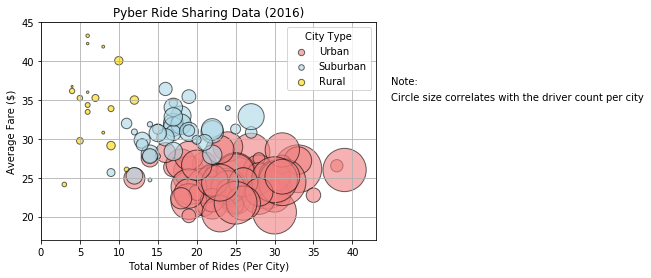

In [32]:

# plot each grouped by data frame by city type; format each type and plot them on the same graph
urbanplot=plt.scatter(numofrides_perucity,averagefee_urban,s=drivercounturban,edgecolors="black",c="lightcoral", alpha=0.6)
suburbanplot=plt.scatter(numofrides_perscity,averagefee_sub,s=drivercountsub,edgecolors="black",c="lightblue", alpha=0.6)
ruralplot=plt.scatter(numofrides_perrcity,averagefee_rural,s=drivercountrural,edgecolors="black",c="gold",alpha=0.6)

#format your graph; titles; labels; legends and notes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#creating and correctly formatting the legend
legend=plt.legend(citytype,title="City Type",loc="upper right",markerscale=.3)
legend.legendHandles[0]._sizes=legend.legendHandles[1]=legend.legendHandles[2]._sizes=[40]

#place graph on a grid and set the limits of the x and y axis
plt.grid()
plt.xlim(0,43)
plt.ylim(17,45)

#notes
plt.text(45,37,"Note:")
plt.text(45,35,"Circle size correlates with the driver count per city")

plt.savefig("../Pyber/rideout.png")
plt.show()

In [33]:
totalrides=city_ride_data["type"].count()

In [34]:
#calculate percent totals TOTAL RIDES BY CITY TYPE

percent_urban=(sum(numofrides_perucity)/totalrides)*100
percent_sub=(sum(numofrides_perscity)/totalrides)*100
percent_rural=(sum(numofrides_perrcity)/totalrides)*100
citytypespercent_rides=[percent_urban,percent_rural,percent_sub]

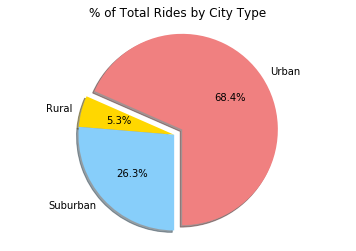

In [35]:
#plot pie chart of ride percentages per city type
labels=["Urban","Rural","Suburban"]
explode=[0.1,0,0]
colors=["lightcoral","gold","lightskyblue"]
plt.pie(citytypespercent_rides,explode=explode,labels=labels,colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

plt.savefig("../Pyber/citytyperides.png")
plt.show()


In [36]:
#calculate fare percents TOTAL FARES BY CITY TYPE and place them in a list to use when plotting pie chart
totalfares_citytype=[totalfares_urban,totalfares_sub,totalfares_rural]
totalfares=totalfares_urban+totalfares_sub+totalfares_rural

pertotalfares_urban=(totalfares_urban/totalfares)*100
pertotalfares_sub=(totalfares_sub/totalfares)*100
pertotalfares_rural=(totalfares_rural/totalfares)*100
citytypepercent_fares=[pertotalfares_urban,pertotalfares_rural,pertotalfares_sub]


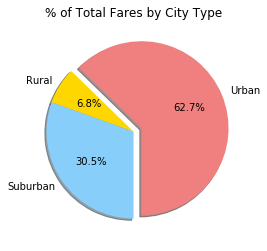

In [37]:
#plot pie chart for total fares per city type
explode=[0.1,0,0]
colors=["lightcoral","gold","lightskyblue"]
plt.pie(citytypepercent_fares, explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=270)
plt.title("% of Total Fares by City Type")

plt.savefig("../Pyber/citytypefares.png")
plt.show()

In [38]:
#calculate the percentages of drivers per city type
totaldrivers=totaldrivercounturban+totaldrivercountsub+totaldrivercountrural

perdrivercount_urban=(totaldrivercounturban/totaldrivers)*100
perdrivercount_sub=(totaldrivercountsub/totaldrivers)*100
perdrivercount_rural=(totaldrivercountrural/totaldrivers)*100

#create a list of percentage drivers per city type for the pie chart
citytypepercent_drivercount=[perdrivercount_urban,perdrivercount_rural,perdrivercount_sub]

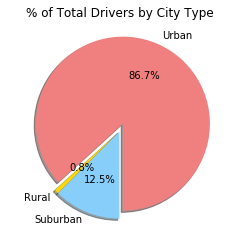

In [39]:
#plot pie chart for total driver counts per city type
explode=[0.1,0,0]
colors=["lightcoral","gold","lightskyblue"]
plt.pie(citytypepercent_drivercount, explode=explode,labels=labels,
        colors=colors,autopct="%1.1f%%",shadow=True,startangle=270)
plt.title("% of Total Drivers by City Type")

plt.savefig("../Pyber/citytypedrivers.png")
plt.show()

